<a href="https://colab.research.google.com/github/UX-MAD/Lab7-DeepMLP-MNIST/blob/main/Lab_VII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),                       # Hidden layer 2
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8677 - loss: 0.4492 - val_accuracy: 0.9663 - val_loss: 0.1159
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9658 - loss: 0.1114 - val_accuracy: 0.9745 - val_loss: 0.0849
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9775 - loss: 0.0709 - val_accuracy: 0.9730 - val_loss: 0.0867
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9833 - loss: 0.0533 - val_accuracy: 0.9797 - val_loss: 0.0727
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0401 - val_accuracy: 0.9753 - val_loss: 0.0837
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9897 - loss: 0.0339 - val_accuracy: 0.9797 - val_loss: 0.0760
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0281 - val_accuracy: 0.9763 - val_loss: 0.0868
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0220 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9732 - loss: 0.1057
Test Accuracy: 0.9775


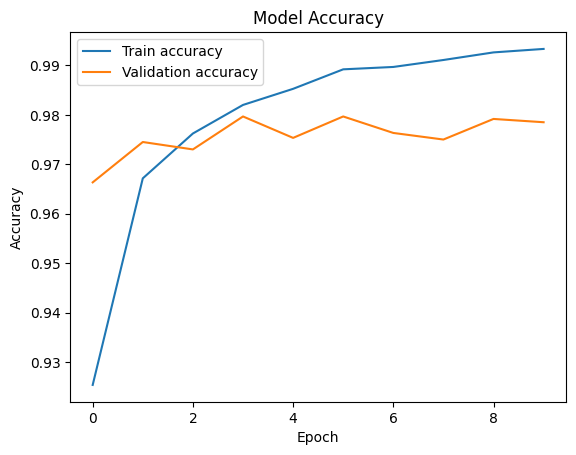

In [ ]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

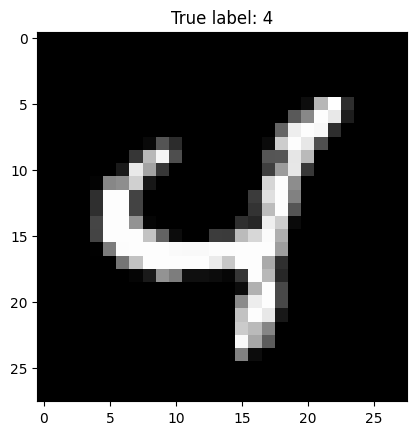

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted label: 4


In [ ]:
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"True label: {y_test[index]}")
plt.show()

pred = np.argmax(model.predict(X_test[index].reshape(1, 784)))
print(f"Predicted label: {pred}")

In [ ]:
!pip -q install keras-tuner --upgrade

import os, json, datetime, numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

np.random.seed(42)
tf.random.set_seed(42)

print(tf.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00
2.19.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data.astype("float32")
y = iris.target.astype("int64")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

perceptron = keras.Sequential([
    keras.layers.Input(shape=(X_train_s.shape[1],)),
    keras.layers.Dense(3, activation="softmax")   # linear logits -> softmax = multi-class perceptron
])

perceptron.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist_perc = perceptron.fit(X_train_s, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

test_acc = perceptron.evaluate(X_test_s, y_test, verbose=0)[1]
print(f"Iris Perceptron Test Accuracy: {test_acc:.3f}")

Iris Perceptron Test Accuracy: 0.633


In [ ]:
def build_small_mlp(activation="relu"):
    model = keras.Sequential([
        layers.Input(shape=(X_train_s.shape[1],)),
        layers.Dense(16, activation=activation),
        layers.Dense(3, activation="softmax"),
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

acts = ["relu", "tanh", "sigmoid", "selu"]
results = {}
for a in acts:
    m = build_small_mlp(a)
    m.fit(X_train_s, y_train, epochs=40, batch_size=16, validation_split=0.2, verbose=0)
    acc = m.evaluate(X_test_s, y_test, verbose=0)[1]
    results[a] = float(acc)

print("Activation comparison (Iris):", results)

Activation comparison (Iris): {'relu': 0.7666666507720947, 'tanh': 0.800000011920929, 'sigmoid': 0.7666666507720947, 'selu': 0.8333333134651184}


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = (x_train / 255.0).astype("float32")
x_test  = (x_test  / 255.0).astype("float32")
x_train = x_train.reshape(-1, 28*28)
x_test  = x_test.reshape(-1, 28*28)

fm_model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])
fm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
fm_hist = fm_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)
fm_test_acc = fm_model.evaluate(x_test, y_test, verbose=0)[1]
print(f"Fashion-MNIST Test Accuracy: {fm_test_acc:.3f}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7127 - loss: 0.7904 - val_accuracy: 0.8438 - val_loss: 0.4286
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8356 - loss: 0.4539 - val_accuracy: 0.8547 - val_loss: 0.3886
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8528 - loss: 0.4069 - val_accuracy: 0.8665 - val_loss: 0.3614
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8584 - loss: 0.3823 - val_accuracy: 0.8682 - val_loss: 0.3523
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8662 - loss: 0.3663 - val_accuracy: 0.8725 - val_loss: 0.3410
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8717 - loss: 0.3488 - val_accuracy: 0.8722 - val_loss: 0.3415
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5

In [ ]:
cal = fetch_california_housing()
X = cal.data.astype("float32")
y = cal.target.astype("float32").reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s  = scaler_X.transform(X_test)

reg_mlp = keras.Sequential([
    layers.Input(shape=(X_train_s.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)  # linear output for regression
])
reg_mlp.compile(optimizer="adam", loss="mse", metrics=[keras.metrics.RootMeanSquaredError()])
reg_hist = reg_mlp.fit(X_train_s, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

rmse = reg_mlp.evaluate(X_test_s, y_test, verbose=0)[1]
print(f"California Housing RMSE: {rmse:.3f}")

Epoch 1/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9427 - root_mean_squared_error: 1.3499 - val_loss: 0.5253 - val_root_mean_squared_error: 0.7248
Epoch 2/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4750 - root_mean_squared_error: 0.6889 - val_loss: 0.4415 - val_root_mean_squared_error: 0.6645
Epoch 3/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4019 - root_mean_squared_error: 0.6339 - val_loss: 0.4168 - val_root_mean_squared_error: 0.6456
Epoch 4/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3755 - root_mean_squared_error: 0.6127 - val_loss: 0.3970 - val_root_mean_squared_error: 0.6301
Epoch 5/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3563 - root_mean_squared_error: 0.5969 - val_loss: 0.3946 - val_root_mean_squared_error: 0.6282
Epoch 6/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3507 - root_mean_squared_error: 0.5921 - val_loss: 0.3728 - val_root_mean_squared_error: 0.6106
Epoch 7/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [ ]:
input_all = keras.Input(shape=(X_train_s.shape[1],), name="full")
# choose a subset as "wide" (e.g., first 4 features)
input_wide = layers.Lambda(lambda z: z[:, :4], name="wide_slice")(input_all)

wide = layers.Dense(1, activation=None, name="wide_linear")(input_wide)
deep = layers.Dense(64, activation="relu")(input_all)
deep = layers.Dense(32, activation="relu")(deep)
concat = layers.concatenate([wide, deep], name="concat")
output = layers.Dense(1, name="reg_output")(concat)

wide_deep = keras.Model(inputs=input_all, outputs=output, name="wide_deep_reg")
wide_deep.compile(optimizer="adam", loss="mse", metrics=[keras.metrics.RootMeanSquaredError()])
wd_hist = wide_deep.fit(X_train_s, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

wd_rmse = wide_deep.evaluate(X_test_s, y_test, verbose=0)[1]
print(f"Wide&Deep RMSE: {wd_rmse:.3f}")

Epoch 1/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2488 - root_mean_squared_error: 1.4600 - val_loss: 0.5972 - val_root_mean_squared_error: 0.7728
Epoch 2/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5412 - root_mean_squared_error: 0.7352 - val_loss: 0.4711 - val_root_mean_squared_error: 0.6864
Epoch 3/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4216 - root_mean_squared_error: 0.6492 - val_loss: 0.4352 - val_root_mean_squared_error: 0.6597
Epoch 4/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3867 - root_mean_squared_error: 0.6218 - val_loss: 0.4179 - val_root_mean_squared_error: 0.6465
Epoch 5/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3705 - root_mean_squared_error: 0.6086 - val_loss: 0.4040 - val_root_mean_squared_error: 0.6356
Epoch 6/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3587 - root_mean_squared_error: 0.5989 - val_loss: 0.3944 - val_root_mean_squared_error: 0.6280
Epoch 7/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [ ]:
inp = keras.Input(shape=(X_train_s.shape[1],))
h1 = layers.Dense(64, activation="relu")(inp)
h2 = layers.Dense(32, activation="relu", name="aux_tap")(h1)
main_out = layers.Dense(1, name="main_out")(h2)
aux_out  = layers.Dense(1, name="aux_out")(h1)

aux_model = keras.Model(inp, [main_out, aux_out])
aux_model.compile(
    optimizer="adam",
    loss={"main_out": "mse", "aux_out": "mse"},
    loss_weights={"main_out": 0.9, "aux_out": 0.1},
    metrics={"main_out": [keras.metrics.RootMeanSquaredError()]}
)
aux_hist = aux_model.fit(X_train_s, {"main_out": y_train, "aux_out": y_train},
                         epochs=15, batch_size=64, validation_split=0.1, verbose=1)

aux_eval = aux_model.evaluate(X_test_s, {"main_out": y_test, "aux_out": y_test}, verbose=0)
print("Aux model eval (total loss, main_loss, aux_loss, main_RMSE):", aux_eval)

Epoch 1/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - aux_out_loss: 3.6484 - loss: 2.0452 - main_out_loss: 1.8670 - main_out_root_mean_squared_error: 1.3258 - val_aux_out_loss: 0.8739 - val_loss: 0.5724 - val_main_out_loss: 0.5390 - val_main_out_root_mean_squared_error: 0.7341
Epoch 2/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - aux_out_loss: 0.7778 - loss: 0.5082 - main_out_loss: 0.4782 - main_out_root_mean_squared_error: 0.6911 - val_aux_out_loss: 0.6388 - val_loss: 0.4585 - val_main_out_loss: 0.4385 - val_main_out_root_mean_squared_error: 0.6621
Epoch 3/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_out_loss: 0.6080 - loss: 0.4151 - main_out_loss: 0.3937 - main_out_root_mean_squared_error: 0.6274 - val_aux_out_loss: 0.5655 - val_loss: 0.4374 - val_main_out_loss: 0.4231 - val_main_out_root_mean_squared_error: 0.6505
Epoch 4/15
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_out_loss: 0.5377 - loss: 0.3917 - main_out_loss: 0.3754 - main_out_root_mean_squared_error: 0.6127 - val_aux

In [ ]:
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)
path_keras = os.path.join(save_dir, "reg_mlp.keras")
reg_mlp.save(path_keras)

loaded = keras.models.load_model(path_keras)
print("Loaded model RMSE:", loaded.evaluate(X_test_s, y_test, verbose=0)[1])

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loaded model RMSE: 0.5436388254165649


In [ ]:
ckpt_path = os.path.join(save_dir, "best_wide_deep.keras")
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss"),
    keras.callbacks.ModelCheckpoint(ckpt_path, save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)
]
wd2 = keras.models.clone_model(wide_deep)
wd2.compile(optimizer="adam", loss="mse", metrics=[keras.metrics.RootMeanSquaredError()])
wd2.fit(X_train_s, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callbacks, verbose=1)
print("Checkpointed RMSE:", wd2.evaluate(X_test_s, y_test, verbose=0)[1])

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8146 - root_mean_squared_error: 1.3192 - val_loss: 0.6165 - val_root_mean_squared_error: 0.7852 - learning_rate: 0.0010
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5373 - root_mean_squared_error: 0.7328 - val_loss: 0.4616 - val_root_mean_squared_error: 0.6794 - learning_rate: 0.0010
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4114 - root_mean_squared_error: 0.6414 - val_loss: 0.4234 - val_root_mean_squared_error: 0.6507 - learning_rate: 0.0010
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3746 - root_mean_squared_error: 0.6120 - val_loss: 0.4084 - val_root_mean_squared_error: 0.6391 - learning_rate: 0.0010
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3603 - root_mean_squared_error: 0.6001 - val_loss: 0.3997 - val_root_mean_squared_error: 0.6322 - learning_rate: 0.0010
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3505 - root_mean_squared_err

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_cb = keras.callbacks.TensorBoard(log_dir=log_dir)

tb_model = keras.models.clone_model(reg_mlp)
tb_model.compile(optimizer="adam", loss="mse", metrics=[keras.metrics.RootMeanSquaredError()])
tb_model.fit(X_train_s, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[tb_cb], verbose=1)

print("TensorBoard log dir:", log_dir)

Epoch 1/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9060 - root_mean_squared_error: 1.3358 - val_loss: 0.5028 - val_root_mean_squared_error: 0.7091
Epoch 2/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4566 - root_mean_squared_error: 0.6754 - val_loss: 0.4282 - val_root_mean_squared_error: 0.6544
Epoch 3/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3899 - root_mean_squared_error: 0.6243 - val_loss: 0.4114 - val_root_mean_squared_error: 0.6414
Epoch 4/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3683 - root_mean_squared_error: 0.6068 - val_loss: 0.3985 - val_root_mean_squared_error: 0.6313
Epoch 5/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3551 - root_mean_squared_error: 0.5958 - val_loss: 0.3860 - val_root_mean_squared_error: 0.6213
Epoch 6/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3444 - root_mean_squared_error: 0.5868 - val_loss: 0.3740 - val_root_mean_squared_error: 0.6116
Epoch 7/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [ ]:
import keras_tuner as kt

def build_tuned_model(hp: kt.HyperParameters):
    units1 = hp.Int("units1", min_value=32, max_value=256, step=32)
    units2 = hp.Int("units2", min_value=16, max_value=256, step=32)
    lr = hp.Choice("lr", [1e-2, 5e-3, 1e-3, 5e-4])
    drop = hp.Float("drop", 0.0, 0.5, step=0.1)

    inputs = keras.Input(shape=(X_train_s.shape[1],))
    x = layers.Dense(units1, activation="relu")(inputs)
    x = layers.Dropout(drop)(x)
    x = layers.Dense(units2, activation="relu")(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(lr), loss="mse", metrics=[keras.metrics.RootMeanSquaredError()])
    return model

tuner = kt.RandomSearch(
    build_tuned_model,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials=10,
    overwrite=True,
    directory="ktuner",
    project_name="california_reg"
)

tuner.search(X_train_s, y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=0)
best_model = tuner.get_best_models(1)[0]
best_rmse = best_model.evaluate(X_test_s, y_test, verbose=0)[1]
print("Best tuned RMSE:", best_rmse)
print("Best HPs:", tuner.get_best_hyperparameters(1)[0].values)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best tuned RMSE: 0.5385006070137024
Best HPs: {'units1': 96, 'units2': 176, 'lr': 0.005, 'drop': 0.0}


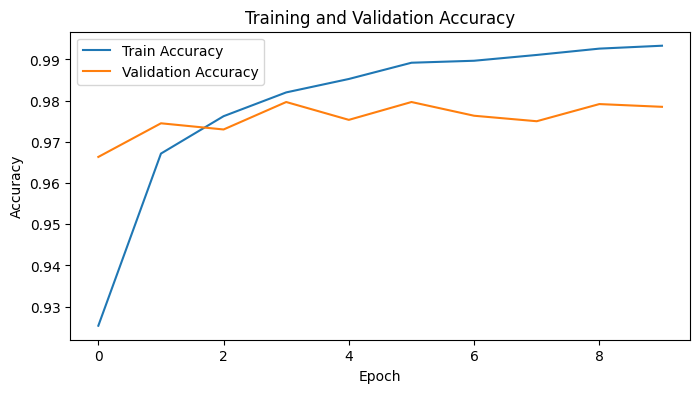

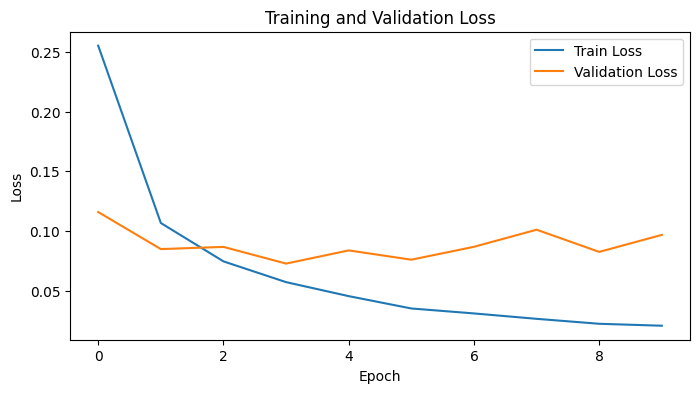

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


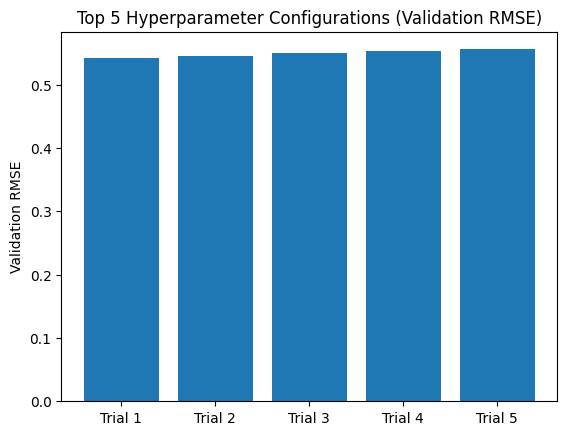

In [ ]:
best_trials = tuner.oracle.get_best_trials(num_trials=5)
scores = [t.metrics.get_last_value("val_root_mean_squared_error") for t in best_trials]
names = [f"Trial {i+1}" for i in range(5)]
plt.bar(names, scores)
plt.title("Top 5 Hyperparameter Configurations (Validation RMSE)")
plt.ylabel("Validation RMSE")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


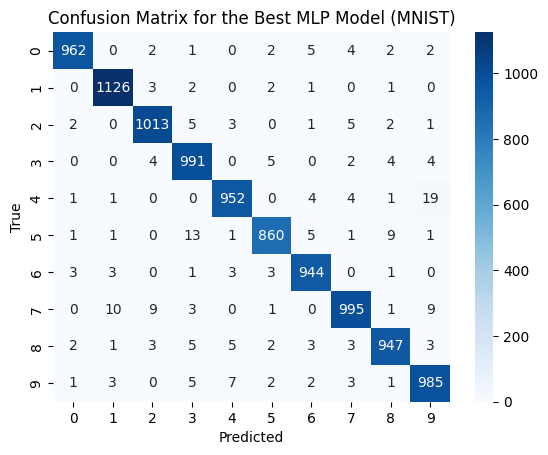

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Reload MNIST test data
(_, _), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()
X_test_mnist = X_test_mnist / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28*28)

# Use the model trained on MNIST
y_pred = np.argmax(model.predict(X_test_mnist), axis=1)
cm = confusion_matrix(y_test_mnist, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for the Best MLP Model (MNIST)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()